In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
car = pd.read_csv('CarPrice_Assignment.csv')

In [4]:
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
car.shape

(205, 26)

In [6]:
car['CarName'].value_counts()

toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64

In [7]:
car['CarNames'] = car['CarName'].apply(lambda x: x.split(" ")[0])
car['CarNames']

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: CarNames, Length: 205, dtype: object

In [8]:
car['CarNames'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: CarNames, dtype: int64

In [9]:
car.loc[car['CarNames'] == "maxda", 'CarNames'] = 'mazda'
car.loc[car['CarNames'] == "toyouta", 'CarNames'] = 'toyota'
car.loc[(car['CarNames'] == "vokswagen") | (car['CarNames'] == 'vw'), 'CarNames'] = 'volkswagen'
car.loc[car['CarNames'] == "Nissan", 'CarNames'] = 'nissan'
car.loc[car['CarNames'] == "porcshce", 'CarNames'] = 'porsche'

In [10]:
car['CarNames'].value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: CarNames, dtype: int64

In [11]:
car = car.drop('CarName' , axis =1)
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [12]:
car['doornumber'].value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [13]:
car['cylindernumber'].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

In [14]:
# A function to map the categorical levels to actual numbers. You can see the categorical levels above and use them for mapping.
def num_map(x):
    return x.map({'two': 2, "three": 3, "four": 4, "five": 5, "six": 6, "eight": 8, "twelve": 12})

# Applying the function to the two columns
car[['cylindernumber', 'doornumber']] = car[['cylindernumber', 'doornumber']].apply(num_map)

In [15]:
numeric = car.select_dtypes(include = ['float64' , 'int64'])
numeric.head()

,car_ID,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [16]:
numeric = numeric.drop('car_ID' , axis=1)

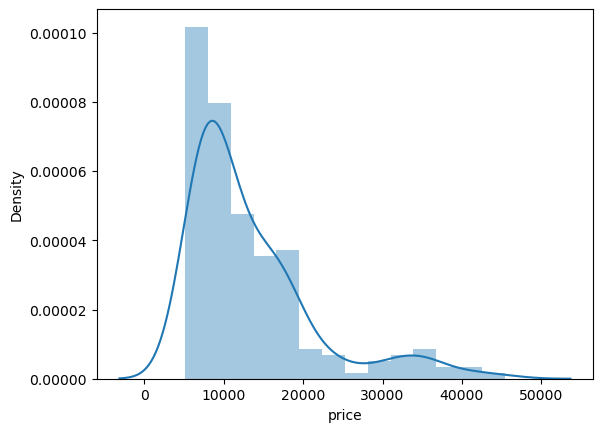

In [17]:
sns.distplot(car['price'])
plt.show()

In [18]:
categorical = car.select_dtypes(include = 'object')
categorical

,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem,CarNames
0,gas,std,convertible,rwd,front,dohc,mpfi,alfa-romero
1,gas,std,convertible,rwd,front,dohc,mpfi,alfa-romero
2,gas,std,hatchback,rwd,front,ohcv,mpfi,alfa-romero
3,gas,std,sedan,fwd,front,ohc,mpfi,audi
4,gas,std,sedan,4wd,front,ohc,mpfi,audi
...,...,...,...,...,...,...,...,...
200,gas,std,sedan,rwd,front,ohc,mpfi,volvo
201,gas,turbo,sedan,rwd,front,ohc,mpfi,volvo
202,gas,std,sedan,rwd,front,ohcv,mpfi,volvo
203,diesel,turbo,sedan,rwd,front,ohc,idi,volvo


In [19]:
car_dummies = pd.get_dummies(categorical, drop_first=True)
car_dummies.head()

,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,...,CarNames_nissan,CarNames_peugeot,CarNames_plymouth,CarNames_porsche,CarNames_renault,CarNames_saab,CarNames_subaru,CarNames_toyota,CarNames_volkswagen,CarNames_volvo
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
car = car.drop(categorical , axis=1)

In [21]:
car = pd.concat([car , car_dummies] ,axis=1)
car

,car_ID,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,...,CarNames_nissan,CarNames_peugeot,CarNames_plymouth,CarNames_porsche,CarNames_renault,CarNames_saab,CarNames_subaru,CarNames_toyota,CarNames_volkswagen,CarNames_volvo
0,1,3,2,88.6,168.8,64.1,48.8,2548,4,130,...,0,0,0,0,0,0,0,0,0,0
1,2,3,2,88.6,168.8,64.1,48.8,2548,4,130,...,0,0,0,0,0,0,0,0,0,0
2,3,1,2,94.5,171.2,65.5,52.4,2823,6,152,...,0,0,0,0,0,0,0,0,0,0
3,4,2,4,99.8,176.6,66.2,54.3,2337,4,109,...,0,0,0,0,0,0,0,0,0,0
4,5,2,4,99.4,176.6,66.4,54.3,2824,5,136,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,4,109.1,188.8,68.9,55.5,2952,4,141,...,0,0,0,0,0,0,0,0,0,1
201,202,-1,4,109.1,188.8,68.8,55.5,3049,4,141,...,0,0,0,0,0,0,0,0,0,1
202,203,-1,4,109.1,188.8,68.9,55.5,3012,6,173,...,0,0,0,0,0,0,0,0,0,1
203,204,-1,4,109.1,188.8,68.9,55.5,3217,6,145,...,0,0,0,0,0,0,0,0,0,1


In [22]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 61 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_ID               205 non-null    int64  
 1   symboling            205 non-null    int64  
 2   doornumber           205 non-null    int64  
 3   wheelbase            205 non-null    float64
 4   carlength            205 non-null    float64
 5   carwidth             205 non-null    float64
 6   carheight            205 non-null    float64
 7   curbweight           205 non-null    int64  
 8   cylindernumber       205 non-null    int64  
 9   enginesize           205 non-null    int64  
 10  boreratio            205 non-null    float64
 11  stroke               205 non-null    float64
 12  compressionratio     205 non-null    float64
 13  horsepower           205 non-null    int64  
 14  peakrpm              205 non-null    int64  
 15  citympg              205 non-null    int

In [23]:
car = car.drop('car_ID' , axis = 1)

# MODEL BUILDING

In [24]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(car, train_size=0.7, test_size=0.3, random_state=100)

Scaling every column except the dummies as they`re already between 0-1

In [25]:
numeric.columns

Index(['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price'],
      dtype='object')

In [26]:

# Import the StandardScaler()
from sklearn.preprocessing import StandardScaler

# Create a scaling object
scaler = StandardScaler()

# Create a list of the variables that you need to scale
varlist = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight','curbweight', 'enginesize', 'boreratio', 'stroke', 
           'compressionratio','horsepower', 'peakrpm', 'citympg', 'highwaympg', 'doornumber', 'cylindernumber', 'price']

# Scale these variables using 'fit_transform'
df_train[varlist] = scaler.fit_transform(df_train[varlist])

In [27]:
df_train.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,CarNames_nissan,CarNames_peugeot,CarNames_plymouth,CarNames_porsche,CarNames_renault,CarNames_saab,CarNames_subaru,CarNames_toyota,CarNames_volkswagen,CarNames_volvo
122,0.170159,0.887412,-0.811836,-0.487238,-0.924500,-1.134628,-0.642128,-0.351431,-0.660242,-1.297329,...,0,0,1,0,0,0,0,0,0,0
125,1.848278,-1.126872,-0.677177,-0.359789,1.114978,-1.382026,0.439415,-0.351431,0.637806,2.432256,...,0,0,0,1,0,0,0,0,0,0
166,0.170159,-1.126872,-0.677177,-0.375720,-0.833856,-0.392434,-0.441296,-0.351431,-0.660242,-0.259197,...,0,0,0,0,0,0,0,1,0,0
1,1.848278,-1.126872,-1.670284,-0.367754,-0.788535,-1.959288,0.015642,-0.351431,0.123485,0.625138,...,0,0,0,0,0,0,0,0,0,0
199,-1.507960,0.887412,0.972390,1.225364,0.616439,1.627983,1.137720,-0.351431,0.123485,1.201877,...,0,0,0,0,0,0,0,0,0,1


In [28]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 122 to 8
Data columns (total 60 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   symboling            143 non-null    float64
 1   doornumber           143 non-null    float64
 2   wheelbase            143 non-null    float64
 3   carlength            143 non-null    float64
 4   carwidth             143 non-null    float64
 5   carheight            143 non-null    float64
 6   curbweight           143 non-null    float64
 7   cylindernumber       143 non-null    float64
 8   enginesize           143 non-null    float64
 9   boreratio            143 non-null    float64
 10  stroke               143 non-null    float64
 11  compressionratio     143 non-null    float64
 12  horsepower           143 non-null    float64
 13  peakrpm              143 non-null    float64
 14  citympg              143 non-null    float64
 15  highwaympg           143 non-null    flo

In [29]:
y_train = df_train.pop('price')
X_train = df_train

FiTIING THE MODEL

In [30]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [31]:
print(lm.coef_)
print(lm.intercept_)

[-8.85082799e-03  2.05396206e-02  2.15459688e-01 -1.20891864e-01
  2.14312437e-01 -1.69734529e-01  2.71975134e-01 -2.88819050e-01
  9.98176607e-01 -3.16364315e-01 -1.09027004e-01 -4.45741225e-01
 -1.28216803e-01  1.89046429e-01  6.10383234e-02  7.95225308e-02
 -7.13939879e-01  3.92563218e-01 -5.68397039e-01 -6.33741325e-01
 -5.33209547e-01 -4.44213621e-01 -6.30834556e-02  4.57246372e-02
  9.85062979e-01  9.02650092e-01  9.94703704e-01  2.82949424e-01
  6.10461201e-01  8.12155616e-03  1.12048455e+00  1.19956250e-01
 -3.05423110e-01  7.13939879e-01 -8.88178420e-16 -4.00301122e-02
 -5.85575952e-02  6.66133815e-16 -1.28333697e-01  1.01695043e+00
  1.12409662e-01 -5.91117054e-01 -7.18611643e-01 -5.01548738e-01
 -3.06608953e-01 -2.48183458e-01 -1.57753086e-01 -2.22044605e-16
 -8.09182737e-01 -2.48597762e-01 -1.33327298e+00 -7.13453493e-01
  7.94779273e-01 -3.31355674e-01  7.05291444e-01 -3.74601778e-01
 -1.77619987e-01 -1.76633338e-01  1.86531496e-02]
0.970168808315671


Intercept around 97 which is a good sign

Since we cant use all 60 features we use RFE to print out the best 15/10

In [32]:
# Import RFE
from sklearn.feature_selection import RFE

# RFE with 15 features
lm = LinearRegression()
rfe1 = RFE(lm, n_features_to_select=10)

# Fit with 15 features
rfe1.fit(X_train, y_train)

# Print the boolean results
print(rfe1.support_)           
print(rfe1.ranking_)  

[False False False False  True False False False  True False False False
 False False False False False False False False False False False False
  True False  True False  True False  True False False False False False
 False False False  True False False False False False False False False
 False False  True False False  True False  True False False False]
[46 44 33 36  1 31 22 37  1 23 38  4 28 29 42 35  3 21 19 17 18 20 40 43
  1 27  1 25  1 47  1 41 15  2 48 32 24 49 14  1 39 13 11  9 30 34  6 50
  5  7  1 12 16  1 26  1  8 10 45]


In [33]:
# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe1
col1 = X_train.columns[rfe1.support_]

# Subsetting training data for 10 selected columns
X_train_rfe1 = X_train[col1]

# Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

,const,carwidth,enginesize,enginelocation_rear,enginetype_l,enginetype_ohcf,enginetype_rotor,CarNames_bmw,CarNames_peugeot,CarNames_renault,CarNames_subaru
122,1.0,-0.924500,-0.660242,0,0,0,0,0,0,0,0
125,1.0,1.114978,0.637806,0,0,0,0,0,0,0,0
166,1.0,-0.833856,-0.660242,0,0,0,0,0,0,0,0
1,1.0,-0.788535,0.123485,0,0,0,0,0,0,0,0
199,1.0,0.616439,0.123485,0,0,0,0,0,0,0,0


In [34]:
# Fitting the model with 10 variables
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     144.3
Date:                Wed, 02 Aug 2023   Prob (F-statistic):           3.98e-64
Time:                        16:55:48   Log-Likelihood:                -33.027
No. Observations:                 143   AIC:                             86.05
Df Residuals:                     133   BIC:                             115.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0506    

FROM THE ABOVE INFO THE ADJUSTED R-SQUARE VALUE AND P VALUE SEEMS GOOD , LETS NOW CHECK THE VIF OF THESE COLUMNS

In [35]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [36]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,enginelocation_rear,inf
5,enginetype_ohcf,inf
10,CarNames_subaru,inf
8,CarNames_peugeot,9.49
4,enginetype_l,8.95
2,enginesize,3.23
1,carwidth,3.17
0,const,1.31
6,enginetype_rotor,1.15
7,CarNames_bmw,1.09


we can see that vif value is inf for the frst 3 columns , removing one of the columns manually

In [37]:
X_train_rfe1 = X_train_rfe1.drop('CarNames_subaru' , axis=1)

NOW REPEATING THE SAME PROCESS

In [38]:
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

,const,carwidth,enginesize,enginelocation_rear,enginetype_l,enginetype_ohcf,enginetype_rotor,CarNames_bmw,CarNames_peugeot,CarNames_renault
122,1.0,-0.924500,-0.660242,0,0,0,0,0,0,0
125,1.0,1.114978,0.637806,0,0,0,0,0,0,0
166,1.0,-0.833856,-0.660242,0,0,0,0,0,0,0
1,1.0,-0.788535,0.123485,0,0,0,0,0,0,0
199,1.0,0.616439,0.123485,0,0,0,0,0,0,0


In [39]:
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     144.3
Date:                Wed, 02 Aug 2023   Prob (F-statistic):           3.98e-64
Time:                        16:55:53   Log-Likelihood:                -33.027
No. Observations:                 143   AIC:                             86.05
Df Residuals:                     133   BIC:                             115.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0506    

In [40]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,CarNames_peugeot,9.49
4,enginetype_l,8.95
2,enginesize,3.23
1,carwidth,3.17
0,const,1.31
3,enginelocation_rear,1.19
6,enginetype_rotor,1.15
5,enginetype_ohcf,1.12
7,CarNames_bmw,1.09
9,CarNames_renault,1.01


VIF IS STILL ABOVE 5 FOR FRST 2 ROWS so removing one of them and getting rid of ENGINETYPE_OHCF as it has an high P value

In [41]:
X_train_rfe1 = X_train_rfe1.drop('enginetype_ohcf' , axis = 1)

In [42]:
X_train_rfe1 = sm.add_constant(X_train_rfe1)

In [43]:
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     160.8
Date:                Wed, 02 Aug 2023   Prob (F-statistic):           8.22e-65
Time:                        16:55:58   Log-Likelihood:                -34.105
No. Observations:                 143   AIC:                             86.21
Df Residuals:                     134   BIC:                             112.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0635    

In [44]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,CarNames_peugeot,9.49
4,enginetype_l,8.94
2,enginesize,3.20
1,carwidth,3.17
0,const,1.19
5,enginetype_rotor,1.14
3,enginelocation_rear,1.09
6,CarNames_bmw,1.09
8,CarNames_renault,1.01


VIF IS STILL ABOVE 5 FOR FRST 2 ROWS so removing one of them

In [45]:
X_train_rfe1 = X_train_rfe1.drop('CarNames_peugeot' , axis = 1)

In [46]:
X_train_rfe1 = sm.add_constant(X_train_rfe1)

In [47]:
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     167.5
Date:                Wed, 02 Aug 2023   Prob (F-statistic):           2.49e-63
Time:                        16:56:06   Log-Likelihood:                -40.550
No. Observations:                 143   AIC:                             97.10
Df Residuals:                     135   BIC:                             120.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0663    

In [48]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,enginesize,3.14
1,carwidth,2.91
0,const,1.19
5,enginetype_rotor,1.14
3,enginelocation_rear,1.09
4,enginetype_l,1.09
6,CarNames_bmw,1.09
7,CarNames_renault,1.00


DROPPING enginetype_l as it has a higher p value

In [49]:
X_train_rfe1 = X_train_rfe1.drop('enginetype_l' , axis = 1)

In [50]:
X_train_rfe1 = sm.add_constant(X_train_rfe1)

In [51]:
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     195.2
Date:                Wed, 02 Aug 2023   Prob (F-statistic):           2.92e-64
Time:                        16:57:53   Log-Likelihood:                -41.121
No. Observations:                 143   AIC:                             96.24
Df Residuals:                     136   BIC:                             117.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0748    

In [52]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,enginesize,3.01
1,carwidth,2.68
4,enginetype_rotor,1.12
0,const,1.10
5,CarNames_bmw,1.09
3,enginelocation_rear,1.08
6,CarNames_renault,1.00


MAKING PREDICTIONS ON OUR DATASET

In [53]:
y_train_price = lm1.predict(X_train_rfe1)

Text(0.5, 0, 'Errors')

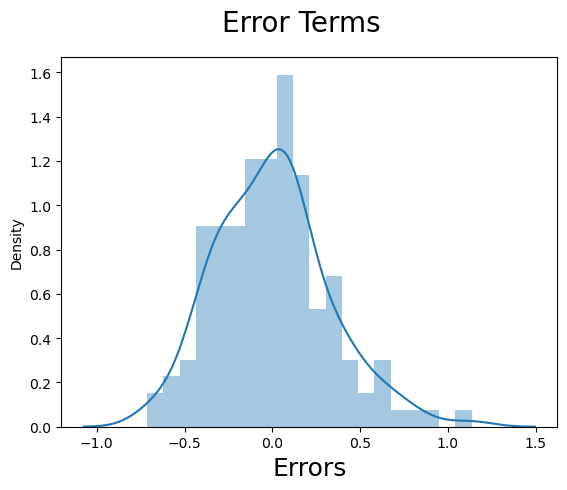

In [54]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)                         

ERRORS SEEM FAIRLY DECENT

In [55]:
df_test[varlist] = scaler.transform(df_test[varlist])

In [56]:
y_test = df_test.pop('price')
X_test = df_test

In [57]:
col1

Index(['carwidth', 'enginesize', 'enginelocation_rear', 'enginetype_l',
       'enginetype_ohcf', 'enginetype_rotor', 'CarNames_bmw',
       'CarNames_peugeot', 'CarNames_renault', 'CarNames_subaru'],
      dtype='object')

In [58]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 160 to 128
Data columns (total 59 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   symboling            62 non-null     float64
 1   doornumber           62 non-null     float64
 2   wheelbase            62 non-null     float64
 3   carlength            62 non-null     float64
 4   carwidth             62 non-null     float64
 5   carheight            62 non-null     float64
 6   curbweight           62 non-null     float64
 7   cylindernumber       62 non-null     float64
 8   enginesize           62 non-null     float64
 9   boreratio            62 non-null     float64
 10  stroke               62 non-null     float64
 11  compressionratio     62 non-null     float64
 12  horsepower           62 non-null     float64
 13  peakrpm              62 non-null     float64
 14  citympg              62 non-null     float64
 15  highwaympg           62 non-null     fl

In [59]:
X_test_rfe = X_test[col1]

In [60]:
X_test_rfe

,carwidth,enginesize,enginelocation_rear,enginetype_l,enginetype_ohcf,enginetype_rotor,CarNames_bmw,CarNames_peugeot,CarNames_renault,CarNames_subaru
160,-0.652569,-0.660242,0,0,0,0,0,0,0,0
186,-0.154030,-0.390836,0,0,0,0,0,0,0,0
59,0.299187,-0.072447,0,0,0,0,0,0,0,0
165,-0.833856,-0.660242,0,0,0,0,0,0,0,0
140,-0.924500,-0.415328,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
28,-0.561926,-0.072447,0,0,0,0,0,0,0,0
29,0.208543,0.760264,0,0,0,0,0,0,0,0
182,-0.154030,-0.684734,0,0,0,0,0,0,0,0
40,-1.513682,-0.366345,0,0,0,0,0,0,0,0


In [61]:
X_test_rfe = X_test_rfe.drop(['enginetype_ohcf', 'CarNames_peugeot','CarNames_subaru','enginetype_l'], axis = 1)

In [62]:
X_test_rfe = sm.add_constant(X_test_rfe)

In [63]:
y_pred = lm1.predict(X_test_rfe)

Text(0, 0.5, 'y_pred')

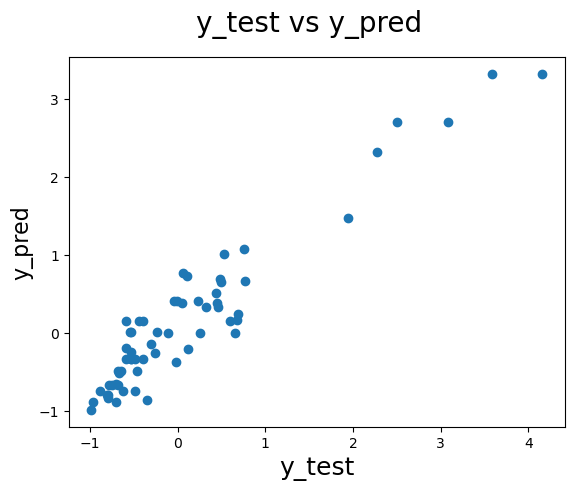

In [64]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_pred', fontsize = 16)  

THE ABOVE IMAGE IS ENOUGH FOR US TO TELL THAT THE MODEL IS DOING FAIRLY DECENT ON THE TEST DATA AS WELL

In [65]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8997211435182687

In [66]:
col1 = col1.drop(['enginetype_ohcf', 'CarNames_peugeot','CarNames_subaru','enginetype_l'],)

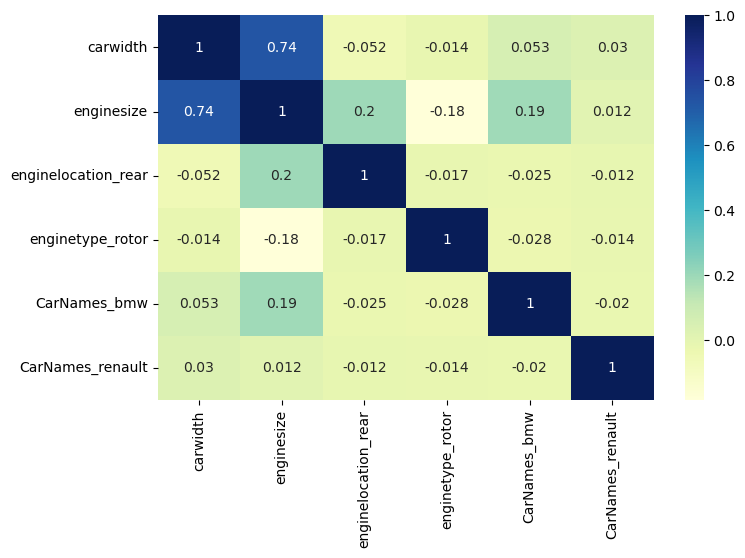

In [67]:
plt.figure(figsize=(8,5))

# Heatmap
sns.heatmap(car[col1].corr(), cmap="YlGnBu", annot=True)
plt.show()

THIS IS OUR RESULTANT MODEL HAVING THE INFLUENTIAL 6 FACTORS AS ITS COLUMNS WITH AN AVERAGE R^2 VALUE OF 89.9